# Protein differential expression exploration
Here we'll explore some visualizations of the proteomic differential expression data we exported from Scaffold Q+.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Read in the data
The formatting of the spreadsheets is very Excel-y, so we need to do some massaging to get the right headers. We are just going to ignore the first few rows, because the information we need is all in row 5.

In [2]:
two_vs_21 = pd.read_csv('../data/proteomics/2_vs_21_O2_differential_expression_results.csv', header=4)
two_vs_21.head()

,#,Visible?,Starred?,Identified Proteins (5249),Accession Number,Alternate ID,Molecular Weight,Protein Grouping Ambiguity,T-Test (p-value) Benjamini-Hochberg (p < 0.00512),Log? Fold Change by Category (Treatment 1 / Reference),...,2D,Std Dev Log? Fold Change(2D),40A,Std Dev Log? Fold Change(40A),40B,Std Dev Log? Fold Change(40B),40C,Std Dev Log? Fold Change(40C),40D,Std Dev Log? Fold Change(40D)
0,1,True,Empty,Cluster of Ribulose bisphosphate carboxylase l...,O03042 [2],rbcL,53 kDa,True,0.33,0.02,...,0.0557,0.356664,0.0182,0.250767,-0.0656,0.258205,0.0293,0.239436,-0.0817,0.232710
1,2,True,Empty,Cluster of Ribulose bisphosphate carboxylase s...,B3H5S2 [2],RBCS3B,21 kDa,True,0.35,-0.08,...,-0.1037,0.363582,-0.0133,0.220745,-0.0732,0.276187,-0.1252,0.224271,-0.1247,0.238921
2,3,True,Empty,"ATP synthase subunit beta, chloroplastic OS=Ar...",P19366,atpB,54 kDa,True,0.62,-0.01,...,-0.0402,0.342753,-0.0097,0.224008,-0.1576,0.259667,-0.031,0.275766,-0.0781,0.226377
3,4,True,Empty,Cluster of Oxygen-evolving enhancer protein 1-...,P23321 [2],PSBO1,35 kDa,True,0.82,0.02,...,-0.0276,0.394998,0.0388,0.243511,-0.1439,0.230651,-0.1403,0.250875,-0.058,0.219546
4,5,True,Empty,Ribulose bisphosphate carboxylase/oxygenase ac...,P10896,RCA,52 kDa,NaN,0.035,-0.05,...,-0.0153,0.304334,0.0128,0.252451,-0.0958,0.234781,-0.1091,0.237200,-0.1108,0.228785


In [3]:
forty_vs_21 = pd.read_csv('../data/proteomics/40_vs_21_O2_differential_expression_results.csv', header=4)
forty_vs_21.head()

,#,Visible?,Starred?,Identified Proteins (5249),Accession Number,Alternate ID,Molecular Weight,Protein Grouping Ambiguity,T-Test (p-value) Benjamini-Hochberg (p < 0.00745),Log? Fold Change by Category (Treatment 2 / Reference),...,2D,Std Dev Log? Fold Change(2D),40A,Std Dev Log? Fold Change(40A),40B,Std Dev Log? Fold Change(40B),40C,Std Dev Log? Fold Change(40C),40D,Std Dev Log? Fold Change(40D)
0,1,True,Empty,Cluster of Ribulose bisphosphate carboxylase l...,O03042 [2],rbcL,53 kDa,True,0.13,-0.02,...,0.0557,0.356664,0.0182,0.250767,-0.0656,0.258205,0.0293,0.239436,-0.0817,0.232710
1,2,True,Empty,Cluster of Ribulose bisphosphate carboxylase s...,B3H5S2 [2],RBCS3B,21 kDa,True,0.31,-0.08,...,-0.1037,0.363582,-0.0133,0.220745,-0.0732,0.276187,-0.1252,0.224271,-0.1247,0.238921
2,3,True,Empty,"ATP synthase subunit beta, chloroplastic OS=Ar...",P19366,atpB,54 kDa,True,< 0.0001,-0.07,...,-0.0402,0.342753,-0.0097,0.224008,-0.1576,0.259667,-0.031,0.275766,-0.0781,0.226377
3,4,True,Empty,Cluster of Oxygen-evolving enhancer protein 1-...,P23321 [2],PSBO1,35 kDa,True,0.3,-0.08,...,-0.0276,0.394998,0.0388,0.243511,-0.1439,0.230651,-0.1403,0.250875,-0.058,0.219546
4,5,True,Empty,Ribulose bisphosphate carboxylase/oxygenase ac...,P10896,RCA,52 kDa,NaN,< 0.0001,-0.08,...,-0.0153,0.304334,0.0128,0.252451,-0.0958,0.234781,-0.1091,0.237200,-0.1108,0.228785


## Exploratory data anlysis
Let's just get an idea for what's going on with some basic plots.

Something I'm curious about is how some of the proteins test significant but seem to have very little fold change, so let's look at the correlation between p-value and logFC.

When the p-value is very small, Scaffold just reports it as the string `< 0.0001`, so we need to change those all to some number in order to be able to plot them; I'm just going to change them all to `0.00009`. There are also some null p-values represetned by `--`, I am going to replace these with `np.nan`

In [4]:
two_vs_21['T-Test (p-value) Benjamini-Hochberg (p < 0.00512)'] = two_vs_21['T-Test (p-value) Benjamini-Hochberg (p < 0.00512)'].replace('< 0.0001', '0.00009')
forty_vs_21['T-Test (p-value) Benjamini-Hochberg (p < 0.00745)'] = forty_vs_21['T-Test (p-value) Benjamini-Hochberg (p < 0.00745)'].replace('< 0.0001', '0.00009')

two_vs_21['T-Test (p-value) Benjamini-Hochberg (p < 0.00512)'] = two_vs_21['T-Test (p-value) Benjamini-Hochberg (p < 0.00512)'].replace('--', np.nan)
forty_vs_21['T-Test (p-value) Benjamini-Hochberg (p < 0.00745)'] = forty_vs_21['T-Test (p-value) Benjamini-Hochberg (p < 0.00745)'].replace('--', np.nan)

In [5]:
two_vs_21['T-Test (p-value) Benjamini-Hochberg (p < 0.00512)'] = two_vs_21['T-Test (p-value) Benjamini-Hochberg (p < 0.00512)'].astype('float64')
forty_vs_21['T-Test (p-value) Benjamini-Hochberg (p < 0.00745)'] = forty_vs_21['T-Test (p-value) Benjamini-Hochberg (p < 0.00745)'].astype('float64')

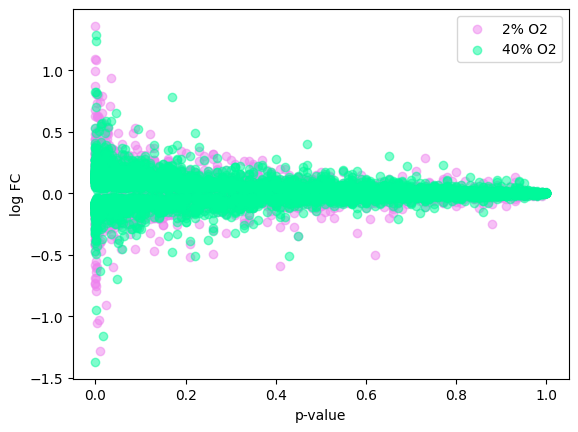

In [6]:
plt.scatter(two_vs_21["T-Test (p-value) Benjamini-Hochberg (p < 0.00512)"], two_vs_21["Log? Fold Change by Category (Treatment 1 / Reference)"], color='violet', label='2% O2', alpha=0.5)
plt.scatter(forty_vs_21["T-Test (p-value) Benjamini-Hochberg (p < 0.00745)"], forty_vs_21["Log? Fold Change by Category (Treatment 2 / Reference)"], color='mediumspringgreen', label='40% O2', alpha=0.5)
plt.ylabel('log FC')
plt.xlabel('p-value')
plt.legend()

That actually looks pretty good! The proteins that are more highly up or down regulated are located near a p-value of 0.

I am also interested in the distribution of log FC across the two conditions:

Text(0.5, 0, 'log FC')

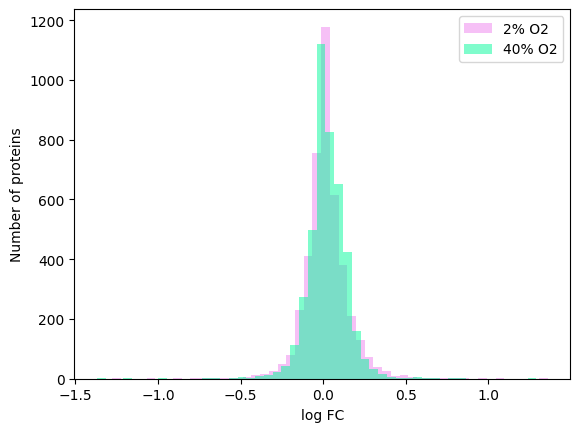

In [7]:
plt.hist(two_vs_21["Log? Fold Change by Category (Treatment 1 / Reference)"], color='violet', label='2% O2', alpha=0.5, bins=50)
plt.hist(forty_vs_21["Log? Fold Change by Category (Treatment 2 / Reference)"], color='mediumspringgreen', label='40% O2', alpha=0.5, bins=50)
plt.legend()
plt.ylabel('Number of proteins')
plt.xlabel('log FC')

Next let's look at the distribution of log FC for the significant ones only:

Text(0.5, 0, 'log FC')

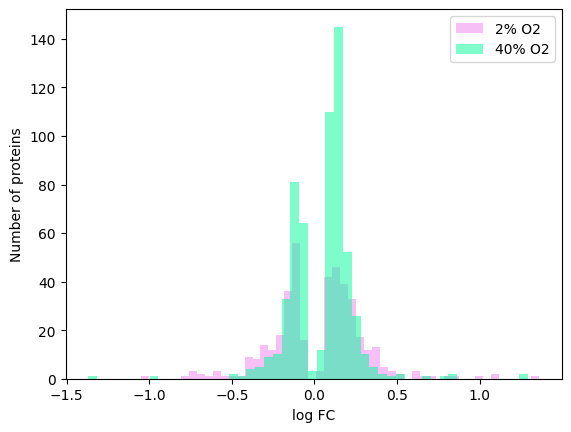

In [8]:
two_signif = two_vs_21["Log? Fold Change by Category (Treatment 1 / Reference)"][two_vs_21["T-Test (p-value) Benjamini-Hochberg (p < 0.00512)"] < 0.00512]
forty_signif = forty_vs_21["Log? Fold Change by Category (Treatment 2 / Reference)"][forty_vs_21["T-Test (p-value) Benjamini-Hochberg (p < 0.00745)"] < 0.00745]
plt.hist(two_signif, color='violet', label='2% O2', alpha=0.5, bins=50)
plt.hist(forty_signif, color='mediumspringgreen', label='40% O2', alpha=0.5, bins=50)
plt.legend()
plt.ylabel('Number of proteins')
plt.xlabel('log FC')

I'm also interested in the identity of the proteins that are identified in each of the conditions. That is, are the most highly up and downregulated proteins the same or different across the two samples? Let's look at this by taking the top ten most significantly up and downregulated proteins across the two conditions and see if they're the same or not:

In [9]:
two_top_ten_up = two_vs_21[two_vs_21["T-Test (p-value) Benjamini-Hochberg (p < 0.00512)"] < 0.00512].sort_values("Log? Fold Change by Category (Treatment 1 / Reference)", ascending=False).head(10)["Identified Proteins (5249)"]
two_top_ten_down = two_vs_21[two_vs_21["T-Test (p-value) Benjamini-Hochberg (p < 0.00512)"] < 0.00512].sort_values("Log? Fold Change by Category (Treatment 1 / Reference)", ascending=True).head(10)["Identified Proteins (5249)"]
forty_top_ten_up = forty_vs_21[forty_vs_21["T-Test (p-value) Benjamini-Hochberg (p < 0.00745)"] < 0.00745].sort_values("Log? Fold Change by Category (Treatment 2 / Reference)", ascending=False).head(10)["Identified Proteins (5249)"]
forty_top_ten_down = forty_vs_21[forty_vs_21["T-Test (p-value) Benjamini-Hochberg (p < 0.00745)"] < 0.00745].sort_values("Log? Fold Change by Category (Treatment 2 / Reference)", ascending=True).head(10)["Identified Proteins (5249)"]

In [10]:
print(two_top_ten_up, '\n\n', forty_top_ten_up)

3825    Chalcone synthase OS=Arabidopsis thaliana OX=3...
3395    UDP-glycosyltransferase 84A2 OS=Arabidopsis th...
1877    Cluster of Leucine-rich repeat extensin-like p...
4031    Beta-carotene 3-hydroxylase 1, chloroplastic O...
2439    FCS-Like Zinc finger 6 OS=Arabidopsis thaliana...
667     Cluster of Histone H2B.10 OS=Arabidopsis thali...
2910    La-related protein 1C OS=Arabidopsis thaliana ...
1506    Calmodulin-like protein 10 OS=Arabidopsis thal...
1754    50S ribosomal protein 5, chloroplastic OS=Arab...
3914    Proline-rich spliceosome-associated (PSP) fami...
Name: Identified Proteins (5249), dtype: object 

 3996    Glutathione S-transferase U1 OS=Arabidopsis th...
3383    Stress up-regulated Nod 19 protein OS=Arabidop...
4118    Major facilitator superfamily protein OS=Arabi...
949     Cluster of 12-oxophytodienoate reductase 1 OS=...
3244    Metallothionein-like protein 2A OS=Arabidopsis...
3385    Marker for oxidative stress response protein O...
998     Glycosyltrans

In [11]:
print(two_top_ten_down, '\n\n', forty_top_ten_down)

3657    2-oxoglutarate (2OG) and Fe(II)-dependent oxyg...
3087    (DL)-glycerol-3-phosphatase 1, mitochondrial O...
2777    Beta-amylase OS=Arabidopsis thaliana OX=3702 G...
1802    At2g16660/T24I21.7 OS=Arabidopsis thaliana OX=...
1819    TSK-associating protein 1 OS=Arabidopsis thali...
4271    GDSL esterase/lipase CPRD49 OS=Arabidopsis tha...
1948    Allene oxide cyclase 1, chloroplastic OS=Arabi...
2054    Lon protease homolog 2, peroxisomal OS=Arabido...
3858                                               Q5XVA8
3786    Adenine nucleotide alpha hydrolases-like super...
Name: Identified Proteins (5249), dtype: object 

 4176    Late embryogenis abundant protein 2 OS=Arabido...
3087    (DL)-glycerol-3-phosphatase 1, mitochondrial O...
4040    Protein BIC2 OS=Arabidopsis thaliana OX=3702 G...
966     Protein COLD-REGULATED 15A, chloroplastic OS=A...
2504    F17F16.6 protein OS=Arabidopsis thaliana OX=37...
1315    Probable carotenoid cleavage dioxygenase 4, ch...
1802    At2g16660/T24

Certainly in terms of string similarity we aren't seeing anything, but the protein groupings in this dataset are almost all marked as low confidence, and it's very possible that different names are similar proteins, so we'll have to investigate further here.

## PCA
As a quality control evaluation, we want to plot a PCA. While I'm not totally sure what was originally used to construct the PCA< my best guess is that it was probably the Quantitative Samples Report, so let's start with that.

In [12]:
quant_peps = pd.read_csv('../data/proteomics/quant_peptide_report.csv', header=60)
quant_peps.head()

/tmp/local/49794431/ipykernel_2550013/3215852414.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  quant_peps = pd.read_csv('../data/proteomics/quant_peptide_report.csv', header=60)


,Experiment,Protein Name,Accession Numbers,Alternate IDs,Valid,Exclusive,Sequence,Prob,Modifications,Andromeda P-score,...,40B,40C,40D,+1H,+2H,+3H,+4H,Start,Stop,Other Proteins
0,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aLAALRLEDLR,99%,TMT-16plex (+304),70.332,...,-0.1921,0.4229,-0.06103,0.0,1.0,1.0,0.0,129.0,139.0,NaN
1,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aMHAVIDR,99%,TMT-16plex (+304),89.355,...,-0.05328,-0.1876,-0.009287,0.0,1.0,2.0,0.0,296.0,303.0,NaN
2,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,amHAVIDR,99%,"TMT-16plex (+304), Oxidation (+16)",76.774,...,-0.06467,-0.1137,0.07657,0.0,3.0,3.0,0.0,296.0,303.0,NaN
3,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,dLAVEGNEIIR,100%,TMT-16plex (+304),98.943,...,-0.0944,0.02082,-0.0532,0.0,78.0,28.0,0.0,436.0,446.0,NaN
4,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,dNGLLLHIHR,100%,TMT-16plex (+304),110.390,...,0.1108,0.09854,0.05796,0.0,3.0,7.0,5.0,286.0,295.0,NaN


We need to transpose the data and remove the labels in order to prep the data for PCA:

In [14]:
quant_peps.columns

Index(['Experiment', 'Protein Name', 'Accession Numbers', 'Alternate IDs',
       'Valid', 'Exclusive', 'Sequence', 'Prob', 'Modifications',
       'Andromeda P-score', 'preA', 'preB', 'preC', 'preD', '2A', '2B', '2C',
       '2D', '21A', '21B', '21C', '21D', '40A', '40B', '40C', '40D', '+1H',
       '+2H', '+3H', '+4H', 'Start', 'Stop', 'Other Proteins'],
      dtype='object')

In [50]:
sample_names = ['2A', '2B', '2C', '2D', '21A', '21B', '21C', '21D', '40A', '40B', '40C', '40D']

In [30]:
quant_for_pca = quant_peps[sample_names].iloc[:-1].T
quant_for_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,30652,30653,30654,30655,30656,30657,30658,30659,30660,30661
2A,-0.3062,0.07164,-0.2487,0.006535,-0.05288,-0.1369,-0.03165,-0.02267,0.03622,0.03875,...,-0.2111,0.3179,0.01843,-0.001873,0.1336,0.1218,-0.0446,0.1614,0.1639,-0.2344
2B,-0.2685,-0.1261,-0.3997,-0.04212,-0.07011,-0.1985,-0.0718,-0.02666,0.02525,-0.02309,...,-0.1242,0.7692,-0.1899,0.003677,-0.07641,-0.0481,-0.1376,0.1311,-0.05667,-0.01018
2C,0.04936,0.7227,0.4863,0.02957,-0.01965,0.3997,0.04544,0.03397,0.05075,0.008318,...,-0.0871,0.01851,-0.09219,0.05311,-0.2307,0.3061,-0.205,0.1709,0.2928,-0.3262
2D,-0.003336,0.6665,0.3791,0.03275,0.1778,0.5936,0.04651,-0.1287,0.007793,-0.07853,...,-0.1269,-0.3057,-0.1259,-0.0008259,-0.03617,0.346,-0.09506,0.07363,0.08654,-0.1544
21A,0.2338,-0.2158,-0.2298,0.06059,-0.04571,0.01073,0.0624,0.01042,0.008648,-0.02993,...,0.069,0.2322,-0.03095,0.02343,-0.08317,0.1683,0.04502,0.2454,-0.2208,-0.0008907


There are of course no standard values filling in places where there's missing data, so we have to replace several kinds of strings in order to convert the datatypes of each column to floats:

In [41]:
a = (quant_for_pca.fillna(1).apply(lambda x: pd.to_numeric(x, errors='coerce')))
row_idxs, col_idxs = np.where(pd.isnull(a))
nan_strings = [quant_for_pca.iloc[i, j] for i, j in zip(row_idxs, col_idxs)]
print(set(nan_strings))

{'No values', 'Value missing', 'Reference missing'}


In [88]:
quant_for_pca = quant_for_pca.replace(['No values', 'Value missing', 'Reference missing'], 0)
quant_for_pca = quant_for_pca.astype('float64')

In [89]:
X = quant_for_pca.to_numpy()
y = np.array([i[:-1] + '% O2' for i in quant_for_pca.index.tolist()])

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

Text(0, 0.5, 'PC2 (22.08%)')

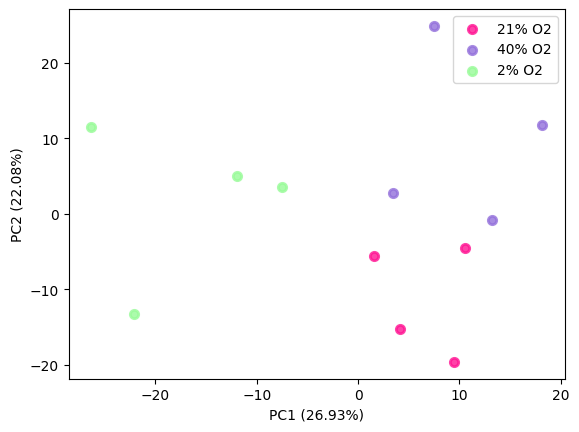

In [91]:
plt.figure()
colors = ["deeppink", "mediumpurple", "palegreen"]
sample_groups = np.array(list(set([i[:-1] + '% O2' for i in sample_names])))
pc1_ex_var, pc2_ex_var = pca.explained_variance_ratio_
lw = 2

for color, i, group in zip(colors, sample_groups, sample_groups):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=group
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel(f'PC1 ({pc1_ex_var*100:.2f}%)')
plt.ylabel(f'PC2 ({pc2_ex_var*100:.2f}%)')

This is a very different PCA than the one that Kaila reported, so maybe the quantitative peptide information is not what I should be using the build the PCA. Let's try this using the Quantitative Spectrum Report instead:

In [84]:
quant_spec = pd.read_csv('../data/proteomics/quant_spectrum_report.csv', header=60)
quant_spec.head()

/tmp/local/49794431/ipykernel_2550013/222574151.py:1: DtypeWarning: Columns (4,5,12,17,21,22,23,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  quant_spec = pd.read_csv('../data/proteomics/quant_spectrum_report.csv', header=60)


,Experiment,Protein Name,Accession Numbers,Alternate IDs,Valid,Exclusive,Sequence,Prob,Modifications,Andromeda P-score,...,Stdev,Log Intensity,Observed,Actual Mass,Charge,Delta Da,Delta PPM,Spectrum ID,Bio Sample,MS/MS Sample
0,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aLAALRLEDLR,99%,TMT-16plex (+304),70.332,...,0.133170,26.555466,772.975817,1543.937081,2.0,0.000124,0.080535,"hf2023072714,scan_23915,type_MULTI-MSMS",Walker Data,Data: hf2023072701 and 11 more
1,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aLAALRLEDLR,100%,TMT-16plex (+304),120.770,...,0.132281,27.089565,515.652964,1543.937065,3.0,0.000140,0.090891,"hf2023072714,scan_23907,type_MULTI-MSMS",Walker Data,Data: hf2023072701 and 11 more
2,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aMHAVIDR,99%,TMT-16plex (+304),89.355,...,0.140456,24.809607,406.231234,1215.671875,3.0,0.000072,0.058876,"hf2023072714,scan_10177,type_MULTI-MSMS",Walker Data,Data: hf2023072701 and 11 more
3,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aMHAVIDR,99%,TMT-16plex (+304),106.140,...,0.132234,27.550098,608.843217,1215.671881,2.0,0.000066,0.053944,"hf2023072714,scan_10176,type_MULTI-MSMS",Walker Data,Data: hf2023072701 and 11 more
4,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aMHAVIDR,99%,TMT-16plex (+304),90.657,...,0.140456,24.745186,406.231234,1215.671875,3.0,0.000072,0.058876,"hf2023072703,scan_10173,type_MULTI-MSMS",Walker Data,Data: hf2023072701 and 11 more


In [106]:
quant_spec_for_pca = quant_spec[sample_names].iloc[:-1].T
quant_spec_for_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,71300,71301,71302,71303,71304,71305,71306,71307,71308,71309
2A,-0.1736,-0.4399,-0.03464,0.1196,0.1226,-0.3159,-0.1643,-0.5112,-0.4337,0.0593,...,-0.2118,0.3169,0.01781,-0.002424,0.133,0.1211,-0.0452,0.1608,0.1631,-0.2351
2B,-0.008904,-0.5286,-0.1753,-0.09943,-0.1041,-0.7557,-0.3418,-0.4429,-0.5164,-0.3044,...,-0.125,0.7683,-0.1906,0.003126,-0.07696,-0.0488,-0.1382,0.1305,-0.05738,-0.01082
2C,0.05798,0.03921,0.7789,0.9298,0.2868,0.4738,0.558,0.3746,0.3907,1.046,...,-0.08782,0.01757,-0.09281,0.05256,-0.2313,0.3047,-0.2056,0.1703,0.2914,-0.3268
2D,0.007103,-0.0153,0.7057,0.9085,0.2176,0.2487,0.3372,0.2304,0.3857,1.056,...,-0.1277,-0.3066,-0.1265,-0.001377,-0.03672,0.3446,-0.09566,0.07305,0.08583,-0.155
21A,0.1367,0.3269,-0.2841,-0.1885,-0.1804,-0.1842,-0.1857,-0.1029,-0.06998,-0.4215,...,0.06827,0.2312,-0.03157,0.02288,-0.08372,0.1676,0.04442,0.2448,-0.2216,-0.001535


In [107]:
a = (quant_spec_for_pca.fillna(1).apply(lambda x: pd.to_numeric(x, errors='coerce')))
row_idxs, col_idxs = np.where(pd.isnull(a))
nan_strings = [quant_spec_for_pca.iloc[i, j] for i, j in zip(row_idxs, col_idxs)]
print(set(nan_strings))

{'Reference missing (-0.30913162)', 'No values (0.0780735)', 'Value missing (0.12872124)', 'Value missing (0.109939575)', 'Value missing (-0.22015953)', 'No values (0.014966965)', 'Value missing (0.15085793)', 'Value missing (-0.058259964)', 'Value missing (-0.11643982)', 'Value missing (0.16451454)', 'Reference missing (-0.095454216)', 'Value missing (0.04109192)', 'Value missing (-7.5530586)', 'Value missing (-0.37354088)', 'Value missing (-0.09176636)', 'Value missing (0.15303993)', 'Value missing (-0.108854294)', 'Value missing (-0.23513031)', 'Value missing (-0.120456696)', 'Value missing (0.051700592)', 'Value missing (-0.07111931)', 'Value missing (-0.06458092)', 'Value missing (-0.16052628)', 'Value missing (-0.1694603)', 'Value missing (-0.741127)', 'Value missing (0.037750244)', 'Value missing (-1.3690319)', 'Value missing (-2.3468761)', 'Reference missing (0.116532326)', 'No values (0.025053024)', 'No values (0.08815956)', 'No values (0.10431671)', 'Value missing (0.08371162

It's unclear to me what the values are in parentheses if those values are supposedly missing, just going to replace them all with `NaN`:

In [108]:
nan_strings = list(set([i[:i.index('(')] + '*' for i in nan_strings]))
print(nan_strings)
quant_spec_for_pca = quant_spec_for_pca.replace(nan_strings, 0, regex=True)
quant_spec_for_pca = quant_spec_for_pca.astype('float64')

['No values *', 'Reference missing *', 'Value missing *']


/tmp/local/49794431/ipykernel_2550013/987023305.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  quant_spec_for_pca = quant_spec_for_pca.replace(nan_strings, 0, regex=True)


In [109]:
X = quant_spec_for_pca.to_numpy()
y = np.array([i[:-1] + '% O2' for i in quant_spec_for_pca.index.tolist()])

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

Text(0, 0.5, 'PC2 (20.21%)')

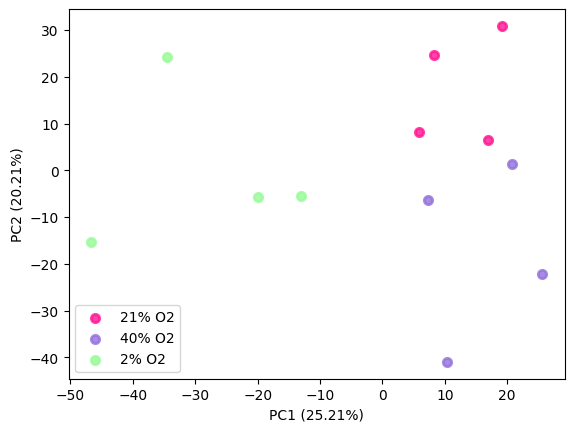

In [110]:
plt.figure()
colors = ["deeppink", "mediumpurple", "palegreen"]
sample_groups = np.array(list(set([i[:-1] + '% O2' for i in sample_names])))
pc1_ex_var, pc2_ex_var = pca.explained_variance_ratio_
lw = 2

for color, i, group in zip(colors, sample_groups, sample_groups):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=group
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel(f'PC1 ({pc1_ex_var*100:.2f}%)')
plt.ylabel(f'PC2 ({pc2_ex_var*100:.2f}%)')

Also doesn't look like Xinyu's, not totally sure what else I would use. The Google AI box says that usually peptide abundances are used, which is what I initially did; I'm not sure what Xinyu did, but I am going to leave this here for now.